# 1. Introduction

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. `In this mission, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these`.

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports.

## TODO:
* Use the pandas.read_csv() function to read the World_Happiness_2016.csv file into a dataframe called happiness2016 and the World_Happiness_2017.csv file into a dataframe called happiness2017.
* Add a column called Year to each dataframe with the corresponding year. For example, the Year column in happiness2015 should contain the value 2015 for each row.

In [1]:
import pandas as pd

happiness2015=pd.read_csv('World_Happiness_2015.csv')
happiness2015['Year']=2015

happiness2016=pd.read_csv('World_Happiness_2016.csv')
happiness2016['Year']=2016

happiness2017=pd.read_csv('World_Happiness_2017.csv')
happiness2017['Year']=2017

In [2]:
head_2015=happiness2015[['Country','Happiness Score', 'Year']].head(3)

In [3]:
head_2016=happiness2016[['Country','Happiness Score', 'Year']].head(3)

# 2. Combining Dataframes with the Concat Function

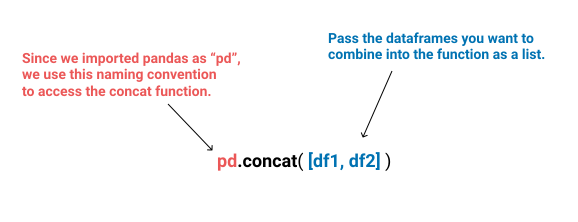

In [4]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/344/Concat_syntax.svg')

## TODO:
* Use the pd.concat() function to combine head_2015 and head_2016 along axis = 0. Remember to pass the head_2015 and head_2016 into the function as a list. Assign the result to concat_axis0.
* Use the pd.concat() function to combine head_2015 and head_2016 along axis = 1. Remember to pass head_2015 and head_2016 into the function as a list and set the axis parameter equal to 1. Assign the result to concat_axis1.

In [5]:
concat_axis0=pd.concat([head_2015,head_2016],axis=0)
concat_axis1=pd.concat([head_2015,head_2016],axis=1)

In [6]:
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [7]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


# 3. Combining Dataframes with the Concat Function Continued

you probably noticed that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed. For this reason, `when you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together`.

However, what happens if the dataframes have different shapes or columns?

In [8]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)

In [9]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [10]:
concat_axis0=pd.concat([head_2015,head_2016],sort=False)

In [11]:
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


Note that because the Standard Error column didn't exist in head_2016, `NaN values were created to signify those values are missing`. By default, the concat function will keep ALL of the data, no matter if missing values are created.

`Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.`

Luckily, the concat function has a parameter, `ignore_index`, that can be used to clear the existing index and reset it in the result

In [12]:
concat_axis0=pd.concat([head_2015,head_2016],sort=False,ignore_index=True)
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


# 5. Joining Dataframes with the Merge Function

**`Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time`**

With the merge() function, `we'll combine dataframes on a key`, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

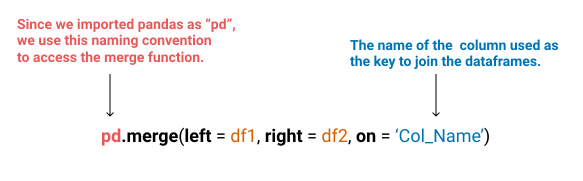

In [13]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/344/Merge_syntax.svg')

## TODO:
* Use the pd.merge() function to join three_2015 and three_2016 on the Country column. Assign the result to merged.

In [14]:
three_2015=happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016=happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged=pd.merge(left=three_2015,right=three_2016,on='Country')

In [15]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


# 6. Joining on Columns with the Merge Function

In [16]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [17]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


**This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key**

The term "join" originates from SQL (or structured query language), a language used to work with databases. If you're a SQL user, you'll recognize the following concepts. If you've never used SQL, don't worry! No prior knowledge is neccessary for this mission, but we will learn SQL later in this path.

There are actually four different types of joins:

* `Inner`: only includes elements that appear in both dataframes with a common key
* `Outer`: includes all data from both dataframes
* `Left`: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
* `Right`: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

## TODO:
* Update merged to use a left join instead of an inner join. Set the how parameter to 'left' in merge(). Assign the result to merged_left.
* Update merged_left so that the left parameter equals three_2016 and the right parameter equals three_2015. Assign the result to merged_left_updated.

In [18]:
merged_left=pd.merge(left=three_2015,right=three_2016,on='Country',how='left')

In [19]:
merged_left_updated=pd.merge(left=three_2016,right=three_2015,on='Country',how='left')

In [20]:
print(merged_left)
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


# 7. Left Joins with the Merge Function

Let's summarize what we learned in the last exercise:

* Changing the join type from an inner join to a left join resulted in a dataframe with more rows and created NaNs.
* When using a left join, interchanging the dataframes assigned to the left and right parameters changes the results.

## TODO:

* Update merged to use the suffixes _2015 and _2016. Set the suffixes parameter to ('_2015', '_2016') in merge(). Assign the result to merged_suffixes.
* Update merged_updated to use the suffixes _2015 and _2016. Notice that the "left" dataframe is three_2016 and the "right" dataframe is three_2015. Assign the result to merged_updated_suffixes.

In [21]:
merged_suffixes=pd.merge(left=three_2015,right=three_2016,on='Country',how='left',suffixes=('_2015','_2016'))

merged_updated_suffixes=pd.merge(left=three_2016,right=three_2015,on='Country',how='left',suffixes=('_2016','_2015'))

In [22]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


# 8. Join on Index with the Merge Function

To join on the index, we'll set the `left_index` and `right_index` parameters to True

In [23]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


<block><pre>

                                                   pd.concat()	                                  pd.merge()
Default Join Type	                                 Outer	                                       Inner


Can Combine More Than Two Dataframes at a Time?	      Yes	                                        No


Can Combine Dataframes Vertically
(axis=0) or Horizontally (axis=1)?                    Both	                                    Horizontally
                                               

Syntax                                                Concat (Vertically)                   Merge (Join on Columns)
                                                      concat([df1,df2,df3])
                                                                     merge(left=df1,right=df2,how='join_type',on= Col')
                                                        
                                                  Concat (Horizontally)                        Merge (Join on Index)
                                                  concat([df1,df2,df3], axis = 1)   
                                          merge(left=df1,right=df2,how='join_type',left_index=True,right_index=True)
                                                         
<block></pre>

# 9. Challenge: Combine Data and Create a Visualization